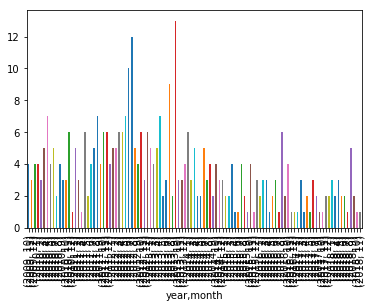

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from icalendar import Calendar, Event
from datetime import datetime

dates = []
file = open('cal.ics','rb')
cal = Calendar.from_ical(file.read())

for e in cal.walk():
    if e.get('summary') == 'x' or e.get('summary') == 'X':
         dates.append(e.get('dtstart').dt.strftime("%Y-%m-%d"))

ts = pd.DataFrame(np.ones(len(dates)),index=dates)

ts["dates"] = pd.to_datetime(dates)

#ts.groupby(ts["dates"].dt.year).count().plot(kind="bar")
#ts.groupby([ts["dates"].dt.year, ts["dates"].dt.month]).count().plot(kind="bar")

ts['dates'].groupby([ts.dates.dt.year.rename('year'), ts.dates.dt.month.rename('month')]).agg('count').plot(kind='bar')


#ts.groupby([(ts["dates"].dt.year),(ts["dates"].dt.month)]).count().plot(kind="bar")
plt.show()


